In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
import torch
from SourceCode.EquationClass import MainEquationClass
from SourceCode.utilities import plot_two_1d_functions
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.IntegralEquations import IntegralEquations
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
from math import pi

from scipy.special import gamma
from math import pi
from math import sqrt

n_epochs = 10
n_points = 20

# №1 Fredholm's equation

### $$ y(x) = sin(\pi*x) + \frac{1}{2}\int_{0}^1y(t)dt $$ ###

$$ analytical solution: y(x) = sin(\pi x) + \frac{2}{\pi} $$

In [3]:

left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) -
                                            torch.sin(pi * curr_v) - 
               0.5 * IntegralEquations.calculateFredholmEquation1D(
                                                        integration_func,
                                                        nn_model,
                                                        curr_v,
                                                        left_border,
                                                        right_border,
                                                        n_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

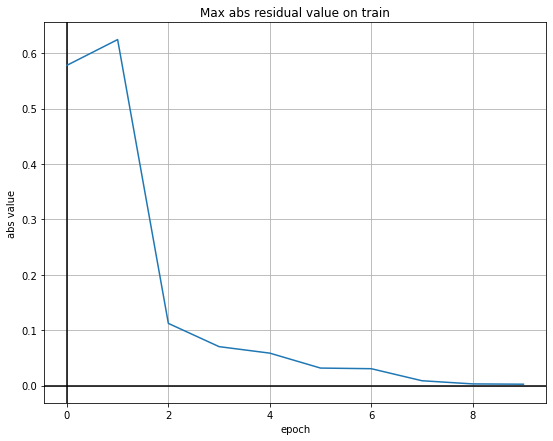

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.002983570098876953
Valid max absolute error |Appr(x)-y(x)|: 0.00239408016204834
MAPE on train data: 0.08461659890599549 %
MAPE on validation data: 0.081686582416296 %
Max abs value of residual on train at last epoch: 0.002339601516723633 


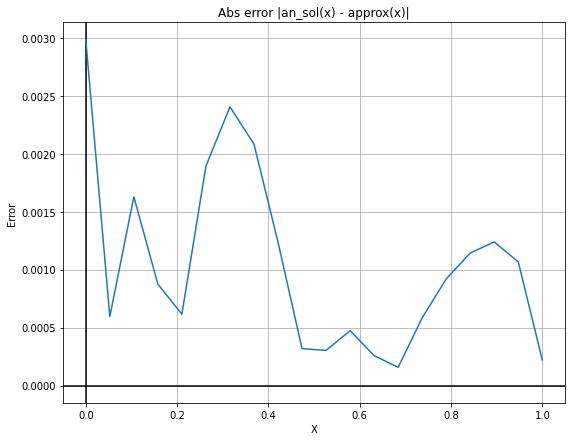

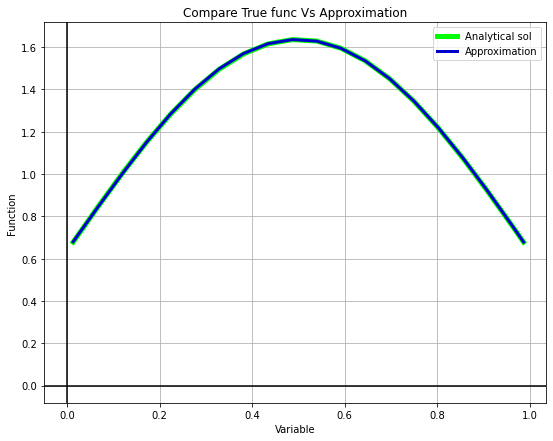

In [4]:
analytical_solution = lambda x_var: torch.sin(pi * x_var) + 2 / pi
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# № 2

### $$y(x) = \frac{1}{2}\int_{0}^{\frac{\pi}{2}}xsin(t)y(t)dt + sin(x)$$ ### 
### $$true\_sol = sin(x) + \frac{\pi x}{4}$$ ###

In [5]:

left_border = 0
right_border = pi/2
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: curr_v * torch.sin(int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               0.5 * IntegralEquations.calculateFredholmEquation1D(
                                    integration_func,
                                    nn_model,
                                    curr_v,
                                    left_border,
                                    right_border,
                                    n_points) - torch.sin(curr_v))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

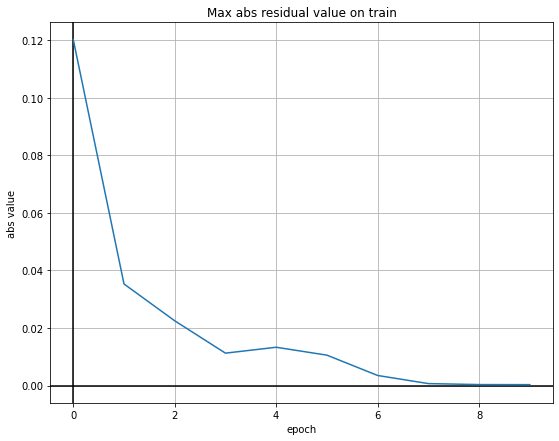

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0014127492904663086
Valid max absolute error |Appr(x)-y(x)|: 0.0013279914855957031
MAPE on train data: 0.06687605637125671 %
MAPE on validation data: 0.06596185266971588 %
Max abs value of residual on train at last epoch: 0.0002962350845336914 


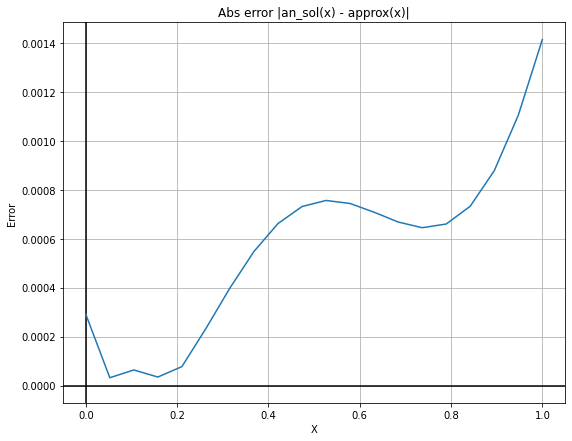

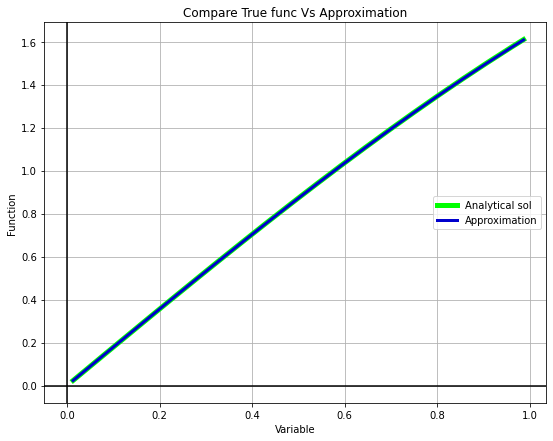

In [6]:
analytical_solution = lambda x_var: torch.sin(x_var) + pi * x_var / 4
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

#  № 3

### $$ y(x) =  \int_{0}^{1}(\sqrt{xt}y(t)dt + x$$ ###
### $$ true\_sol =  x + \frac{4}{5}\sqrt{x}$$ ###

In [7]:

left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sqrt(curr_v * int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               IntegralEquations.calculateFredholmEquation1D(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_points) - curr_v)
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

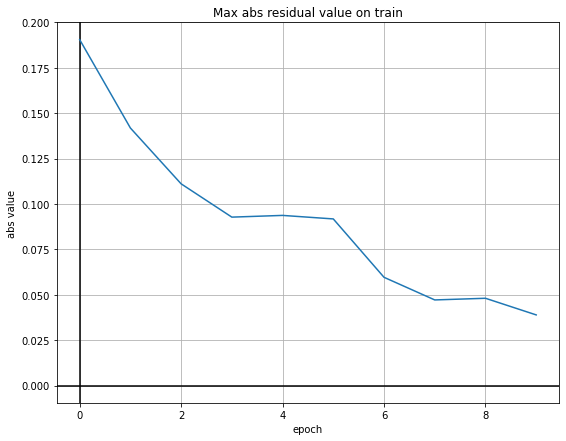

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.03942215442657471
Valid max absolute error |Appr(x)-y(x)|: 0.037232816219329834
MAPE on train data: 1.1496811173856258 %
MAPE on validation data: 1.0326595976948738 %
Max abs value of residual on train at last epoch: 0.03888178616762161 


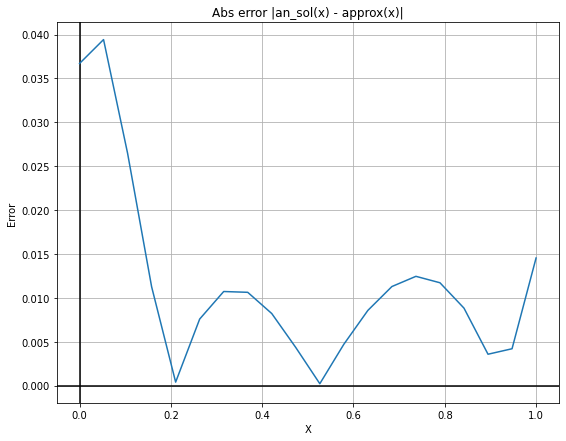

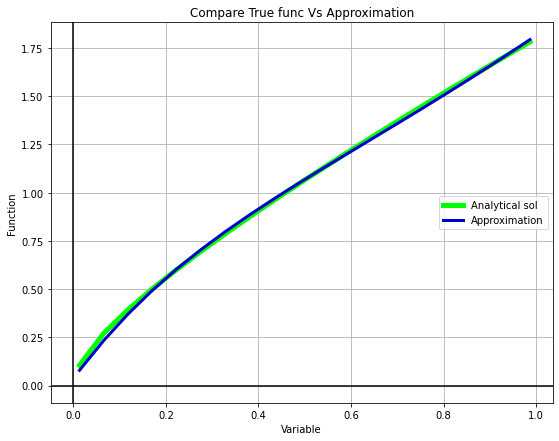

In [8]:
analytical_solution = lambda x_var: x_var + torch.sqrt(x_var) * 0.8
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# № 4 Volterra's equation

### $$ y(x) = sin(x) + \int_{0}^{x}sin(x-t)y(t)dt$$ ###
### $$ true\_sol =  x $$ ###

$$x \in [0,1]$$

In [9]:

left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sin(curr_v - int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - torch.sin(curr_v) - 
               IntegralEquations.calculateVolterraEquation1D(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

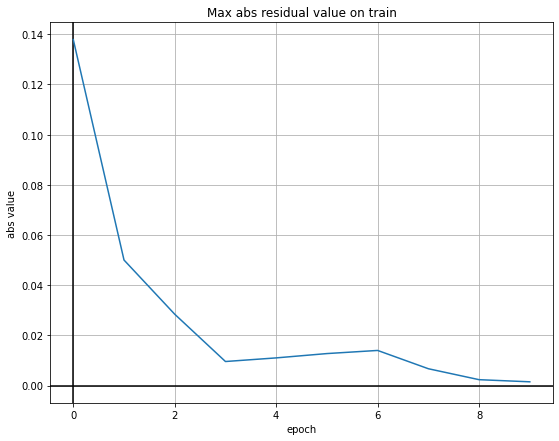

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.00144881010055542
Valid max absolute error |Appr(x)-y(x)|: 0.0012549161911010742
MAPE on train data: 0.13139897491782904 %
MAPE on validation data: 0.12634078739210963 %
Max abs value of residual on train at last epoch: 0.0014719069004058838 


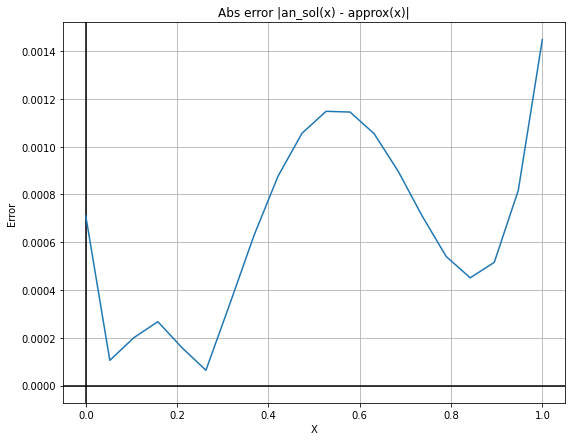

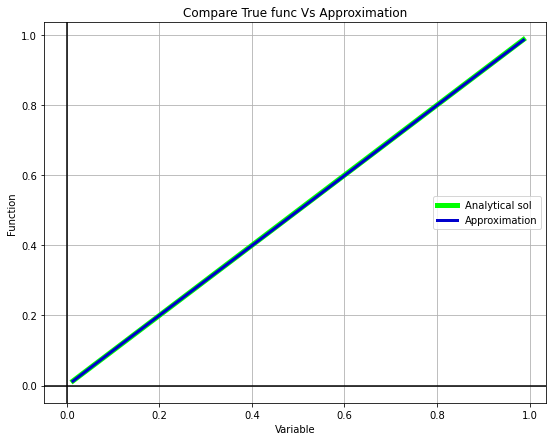

In [10]:
analytical_solution = lambda x_var: x_var
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [11]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.000000      0.000000 -0.000711   0.000711
1   0.052632      0.052632  0.052526   0.000105
2   0.105263      0.105263  0.105463   0.000200
3   0.157895      0.157895  0.158162   0.000267
4   0.210526      0.210526  0.210685   0.000159
5   0.263158      0.263158  0.263094   0.000064
6   0.315789      0.315789  0.315446   0.000343
7   0.368421      0.368421  0.367793   0.000628
8   0.421053      0.421053  0.420176   0.000877
9   0.473684      0.473684  0.472628   0.001057
10  0.526316      0.526316  0.525168   0.001148
11  0.578947      0.578947  0.577802   0.001145
12  0.631579      0.631579  0.630524   0.001055
13  0.684211      0.684211  0.683313   0.000898
14  0.736842      0.736842  0.736132   0.000710
15  0.789474      0.789474  0.788933   0.000540
16  0.842105      0.842105  0.841654   0.000451
17  0.894737      0.894737  0.894221   0.000516
18  0.947368      0.947368  0.946551   0.000818
19  1.000000      1.000000  0